In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

In [3]:
df= pd.read_csv('./data/consensus_dataset_corrected.csv')

In [5]:
X_train, X_test, y_train, y_test= train_test_split( df['ads'], df['consensus'], test_size =0.2)

In [6]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [7]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.996
              precision    recall  f1-score   support

no consensus       0.99      1.00      1.00      1017
   consensus       1.00      0.99      1.00       967

    accuracy                           1.00      1984
   macro avg       1.00      1.00      1.00      1984
weighted avg       1.00      1.00      1.00      1984

confusion matrix:
[[1017    0]
 [   8  959]]



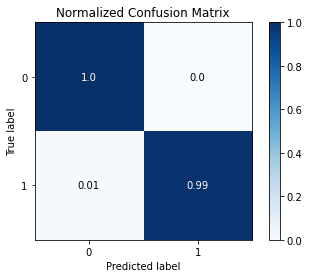

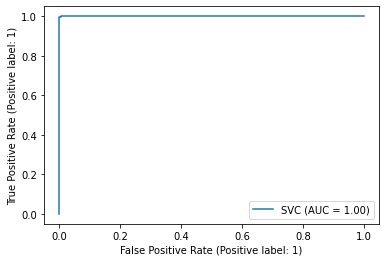

In [8]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [10]:
import string 
df_val = pd.read_csv('./data/sample_consensus.csv').drop('Unnamed: 0', axis=1)

df_val['ad'] = df_val['ad'].str.strip().str.lower() 
df_val['ad'] = df_val['ad'].str.replace('\d+', '')
df_val['ad']=  df_val['ad'].str.translate(str.maketrans('','',string.punctuation))
df_val

C:\Users\elfraiha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


accuracy:   0.786
              precision    recall  f1-score   support

no consensus       0.75      0.60      0.67         5
   consensus       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14

confusion matrix:
[[3 2]
 [1 8]]



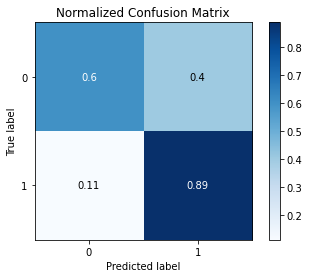

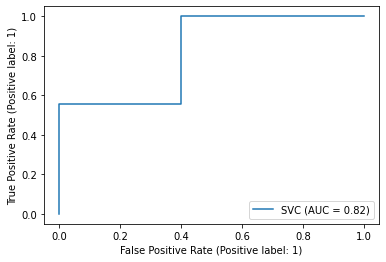

In [11]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)